<a href="https://colab.research.google.com/github/Freddyx94/DE-Fraud-Detection-Pipeline-for-Transactional-Tabular-Data/blob/main/Fraud_Detection_Pipeline_for_Transactional_Tabular_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries and Read into Datasets

In [13]:
import pandas as pd

# Load the datasets into variables
df_a = pd.read_csv('frauddetection.csv')
df_b = pd.read_csv('creditcard.csv')

Data Ingestion

In [14]:
# Load Credit Card dataset
creditcard_path = "creditcard.csv"
credit_df = pd.read_csv(creditcard_path)

# Load Fraud Detection (PaySim) dataset
fraud_path = "frauddetection.csv"
fraud_df = pd.read_csv(fraud_path)

# Quick checks
print("Credit Card Dataset:")
print(credit_df.shape)
print(credit_df.head())

print("\nFraud Detection Dataset:")
print(fraud_df.shape)
print(fraud_df.head())


Credit Card Dataset:
(7973, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   



In [15]:

# Dataset summaries
print("\nCredit Card Info:")
print(credit_df.info())
print(credit_df.describe())

print("\nFraud Detection Info:")
print(fraud_df.info())
print(fraud_df.describe())



Credit Card Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-n

Data Exploratory

In [16]:
#Analyze class imbalance
def analyze_imbalance(df, target_col, dataset_name):
    """Show class distribution with pretty tables"""
    total = len(df)
    fraud = df[target_col].sum()
    legit = total - fraud
    fraud_pct = (fraud / total) * 100

    print(f"\n{'='*60}")
    print(f"{dataset_name} - CLASS DISTRIBUTION")
    print(f"{'='*60}")

    # Create summary table
    summary = pd.DataFrame({
        'Class': ['Legitimate', 'Fraudulent', 'TOTAL'],
        'Count': [f"{legit:,}", f"{fraud:,}", f"{total:,}"],
        'Percentage': [f"{100-fraud_pct:.3f}%", f"{fraud_pct:.3f}%", "100.000%"],
        'Ratio': [f"{legit/fraud:.1f}:1", "1:1", "-"]
    })
    display(summary)

    print(f"\n⚠️  CRITICAL INSIGHT:")
    print(f"    Only {fraud_pct:.3f}% are frauds!")
    print(f"    If we predict ALL as legitimate → {100-fraud_pct:.3f}% accuracy")
    print(f"    BUT we catch ZERO frauds! Accuracy is MISLEADING!")

    return fraud, legit, fraud_pct

# Analyze both datasets
cc_stats = analyze_imbalance(credit_df, 'Class', 'CREDIT CARD')
ps_stats = analyze_imbalance(fraud_df, 'isFraud', 'PAYSIM')


CREDIT CARD - CLASS DISTRIBUTION


,Class,Count,Percentage,Ratio
0,Legitimate,"7,948.0",99.686%,317.9:1
1,Fraudulent,25.0,0.314%,1:1
2,TOTAL,"7,973",100.000%,-



⚠️  CRITICAL INSIGHT:
    Only 0.314% are frauds!
    If we predict ALL as legitimate → 99.686% accuracy
    BUT we catch ZERO frauds! Accuracy is MISLEADING!

PAYSIM - CLASS DISTRIBUTION


,Class,Count,Percentage,Ratio
0,Legitimate,"56,103.0",99.822%,561.0:1
1,Fraudulent,100.0,0.178%,1:1
2,TOTAL,"56,203",100.000%,-



⚠️  CRITICAL INSIGHT:
    Only 0.178% are frauds!
    If we predict ALL as legitimate → 99.822% accuracy
    BUT we catch ZERO frauds! Accuracy is MISLEADING!


Identfying Class count and visualizing them.

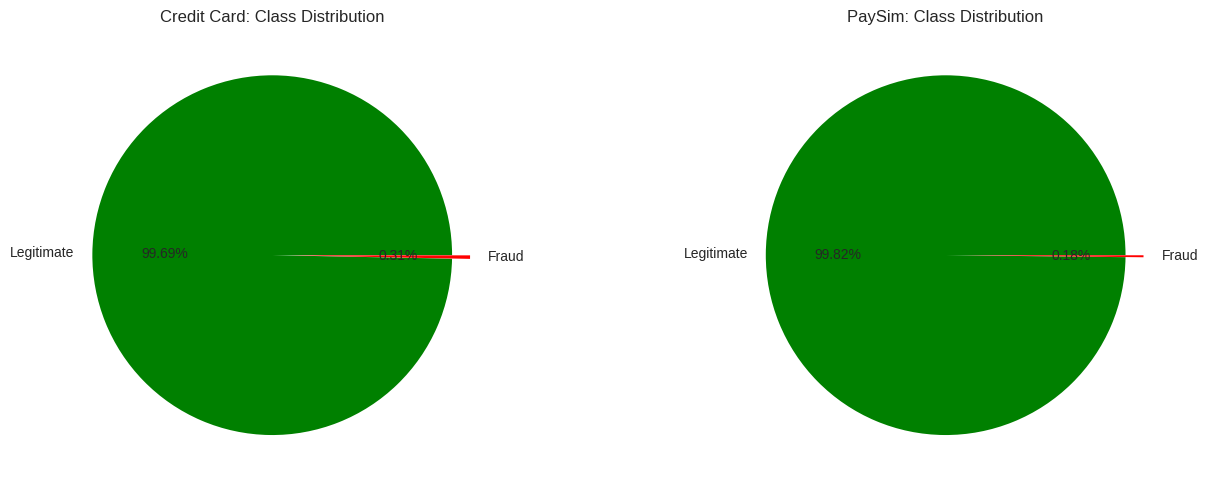

✓ Saved to: results/class_imbalance.png


In [17]:
import matplotlib.pyplot as plt
import os

# CELL 5: Plot class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Credit Card
cc_counts = credit_df['Class'].value_counts()
axes[0].pie(cc_counts, labels=['Legitimate', 'Fraud'], autopct='%1.2f%%',
            colors=['green', 'red'], explode=[0, 0.1])
axes[0].set_title('Credit Card: Class Distribution')

# PaySim
ps_counts = fraud_df['isFraud'].value_counts()
axes[1].pie(ps_counts, labels=['Legitimate', 'Fraud'], autopct='%1.2f%%',
            colors=['green', 'red'], explode=[0, 0.1])
axes[1].set_title('PaySim: Class Distribution')

plt.tight_layout()

# Create the 'results' directory if it doesn't exist
os.makedirs('results', exist_ok=True)

plt.savefig('results/class_imbalance.png', dpi=300)
plt.show()
print("✓ Saved to: results/class_imbalance.png")

Data Cleaning and Preprocessing

In [18]:

# Libraries

import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.utils.validation import check_is_fitted

RANDOM_STATE = 42

# Utility: quick audit prints

def audit_df(df, name="df", n_head=5):
    print(f"\n=== {name} audit ===")
    print("Shape:", df.shape)
    print("Columns:", list(df.columns))
    print("\nDtypes:\n", df.dtypes)
    # Missingness
    na = df.isna().sum()
    if na.sum() == 0:
        print("\nMissing values: none")
    else:
        print("\nMissing values:")
        print(na[na > 0].sort_values(ascending=False).head(20))
    print("\nHead:\n", df.head(n_head))

# Load data (adjust paths if needed)

credit_path = "creditcard.csv"
paysim_path = "frauddetection.csv"

credit_df = pd.read_csv(credit_path)
paysim_df = pd.read_csv(paysim_path)

audit_df(credit_df, "CreditCard (raw)")
audit_df(paysim_df, "PaySim (raw)")

# CREDIT CARD: cleaning
# Columns: Time, V1 - V28, Amount, Class

# 1) Remove duplicate rows if any
credit_df = credit_df.drop_duplicates()

# 2) Ensure numeric types (coerce non-numeric to NaN, then handle)
numeric_cols_cc = ["Time", "Amount"] + [f"V{i}" for i in range(1, 29)]
for c in numeric_cols_cc + ["Class"]:
    if c in credit_df.columns:
        credit_df[c] = pd.to_numeric(credit_df[c], errors="coerce")

# 3) Handle missing values (rare in the canonical dataset). Here:
#  drop rows with NaN in any model feature or target.
credit_df = credit_df.dropna(subset=numeric_cols_cc + ["Class"])

# 4) Separate features & target
X_cc = credit_df[numeric_cols_cc].copy()
y_cc = credit_df["Class"].astype(int).copy()

# CREDIT CARD: preprocessing pipeline
# - Standard scale Time + V1..V28
# - Robust scale Amount due to heavy-tailed distribution
cc_numeric_standard = ["Time"] + [f"V{i}" for i in range(1, 29)]
cc_numeric_robust = ["Amount"]

preprocessor_cc = ColumnTransformer(
    transformers=[
        ("std", StandardScaler(), cc_numeric_standard),
        ("rob", RobustScaler(with_centering=True, with_scaling=True), cc_numeric_robust),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

cc_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor_cc)
])

X_cc_processed = cc_pipeline.fit_transform(X_cc)

# Collect feature names after transform
cc_feature_names = cc_pipeline.named_steps["preprocessor"].get_feature_names_out()

print("\n=== CreditCard processed ===")
print("X_cc_processed shape:", X_cc_processed.shape)
print("y_cc shape:", y_cc.shape)
print("First 5 feature names:", cc_feature_names[:5])

# PAYSIM: cleaning
# Columns (canonical): step, type, amount, nameOrig, oldbalanceOrg,
# newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud
paysim_df = paysim_df.drop_duplicates()

# Ensure expected dtypes
num_cols_ps = [
    "step", "amount",
    "oldbalanceOrg", "newbalanceOrig",
    "oldbalanceDest", "newbalanceDest",
    "isFraud", "isFlaggedFraud"
]
for c in num_cols_ps:
    if c in paysim_df.columns:
        paysim_df[c] = pd.to_numeric(paysim_df[c], errors="coerce")

# Handle missing values minimally:
# - If NaNs exist in essential numeric columns, drop those rows
essential_ps = ["step", "type", "amount", "oldbalanceOrg", "newbalanceOrig",
                "oldbalanceDest", "newbalanceDest", "isFraud"]
paysim_df = paysim_df.dropna(subset=[c for c in essential_ps if c in paysim_df.columns])

# Engineer leakage-resistant residual features
# The PaySim data sometimes makes raw balances near function of amount and target.
# Residuals help reduce direct leakage.
paysim_df["delta_orig"] = paysim_df["oldbalanceOrg"] - paysim_df["amount"] - paysim_df["newbalanceOrig"]
paysim_df["delta_dest"] = paysim_df["newbalanceDest"] - paysim_df["oldbalanceDest"] - paysim_df["amount"]

# Simple error flags (negative deltas can signify inconsistent sequences)
paysim_df["error_orig"] = (paysim_df["delta_orig"].abs() < 1e-9).astype(int)  # exact consistency marker
paysim_df["error_dest"] = (paysim_df["delta_dest"].abs() < 1e-9).astype(int)

# Drop IDs & raw balances to limit leakage
drop_cols_ps = ["nameOrig", "nameDest", "oldbalanceOrg", "newbalanceOrg", "oldbalanceDest", "newbalanceDest"]
for c in drop_cols_ps:
    if c in paysim_df.columns:
        paysim_df = paysim_df.drop(columns=c)

# Final feature set split
target_ps = "isFraud"
X_ps = paysim_df.drop(columns=[target_ps])
y_ps = paysim_df[target_ps].astype(int)

# Identify column types
cat_cols_ps = ["type"] if "type" in X_ps.columns else []
num_cols_ps_final = [c for c in X_ps.columns if c not in cat_cols_ps]

# PAYSIM: preprocessing pipeline
# - OneHot encode 'type' (unknown categories safe)
# - Robust scale numeric features (handles large outliers)
preprocessor_ps = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols_ps),
        ("num", RobustScaler(with_centering=True, with_scaling=True), num_cols_ps_final),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

ps_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor_ps)
])

X_ps_processed = ps_pipeline.fit_transform(X_ps)

# Collect feature names
# (cat feature names + numeric names)
enc_cat = ps_pipeline.named_steps["preprocessor"].named_transformers_.get("cat", None)
if enc_cat is not None and len(cat_cols_ps) > 0:
    cat_feature_names = enc_cat.get_feature_names_out(cat_cols_ps)
else:
    cat_feature_names = np.array([])

num_feature_names = np.array(num_cols_ps_final)
ps_feature_names = np.concatenate([cat_feature_names, num_feature_names])

print("\n=== PaySim processed ===")
print("X_ps_processed shape:", X_ps_processed.shape)
print("y_ps shape:", y_ps.shape)
print("First 10 feature names:", ps_feature_names[:10])




=== CreditCard (raw) audit ===
Shape: (7973, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Dtypes:
 Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

Missing values:
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25    

In [19]:
# Save cleaned data & processed features

credit_df.to_csv("clean_creditcard.csv", index=False)
pd.DataFrame(X_cc_processed, columns=cc_feature_names).to_csv("credit_features_processed.csv", index=False)
pd.DataFrame({"Class": y_cc}).to_csv("credit_target.csv", index=False)

paysim_df.to_csv("clean_paysim.csv", index=False)
pd.DataFrame(X_ps_processed, columns=ps_feature_names).to_csv("paysim_features_processed.csv", index=False)
pd.DataFrame({"isFraud": y_ps}).to_csv("paysim_target.csv", index=False)

Transformation and Feature Engineering

In [20]:

#Import Necessary libraries
import numpy as np
import pandas as pd
import sklearn
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import sparse

print("scikit-learn version:", sklearn.__version__)

RANDOM_STATE = 42
EPS = 1e-9

# robust OneHotEncoder
def make_ohe():
    """
    Create an OneHotEncoder that works on both old and new scikit-learn versions.
    New API uses `sparse_output`, older uses `sparse`.
    """
    try:
        # Newer sklearn (>=1.2)
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        # Older sklearn (<1.2)
        return OneHotEncoder(handle_unknown="ignore", sparse=False)

# Helper: force dense at the end
def to_dense(X):
    """Convert a possibly sparse output to dense numpy array."""
    return X.toarray() if sparse.issparse(X) else X

# Helper: small audit
def audit_df(name, X, y, feat_names=None, n=3):
    print(f"\n=== {name} ===")
    print("X shape:", X.shape, "| y shape:", y.shape)
    if feat_names is not None:
        try:
            df = pd.DataFrame(to_dense(X), columns=feat_names)
            print(df.head(n))
        except Exception as e:
            print("Could not render head DataFrame:", e)

# Load files
credit_path = "creditcard.csv"
paysim_path = "frauddetection.csv"

cc_raw = pd.read_csv(credit_path)
ps_raw = pd.read_csv(paysim_path)

# Basic coercions & drops
cc_cols = ["Time", "Amount"] + [f"V{i}" for i in range(1, 29)] + ["Class"]
for c in cc_cols:
    if c in cc_raw.columns:
        cc_raw[c] = pd.to_numeric(cc_raw[c], errors="coerce")
cc_raw = cc_raw.dropna(subset=[c for c in cc_cols if c in cc_raw.columns]).drop_duplicates()

ps_num = ["step","amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud","isFlaggedFraud"]
for c in ps_num:
    if c in ps_raw.columns:
        ps_raw[c] = pd.to_numeric(ps_raw[c], errors="coerce")
ps_raw = ps_raw.dropna(subset=["step","type","amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]).drop_duplicates()


# CREDIT CARD: Feature Engineering
def cc_feature_engineering(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()

    # Stable log transform for heavy-tailed amounts
    out["log_amount"] = np.log1p(out["Amount"].clip(lower=0))

    # Time-of-day features (assuming Time is seconds since start)
    seconds = out["Time"].clip(lower=0)
    hour = ((seconds // 3600) % 24).astype(int)
    out["hour"] = hour
    out["sin_hour"] = np.sin(2 * np.pi * hour / 24.0)
    out["cos_hour"] = np.cos(2 * np.pi * hour / 24.0)
    out["is_night"] = ((hour < 6) | (hour >= 22)).astype(int)
    return out

# Base features used as input to the feature adder
cc_base_feats = ["Time", "Amount"] + [f"V{i}" for i in range(1, 29)]
cc_binary_flags = ["is_night"]
cc_cyclical = ["sin_hour", "cos_hour"]

# We do feature engineering first (without FunctionTransformer, for max compatibility)
cc_fe = cc_feature_engineering(cc_raw[cc_base_feats].copy())

# ColumnTransformer: use robust settings & avoid version pitfalls
cc_transformer = ColumnTransformer(
    transformers=[
        # Amount quantile bins (encode='onehot' returns sparse on some versions)
        ("amount_bins", KBinsDiscretizer(n_bins=8, encode="onehot", strategy="quantile"), ["Amount"]),
        # Standard scale Time + PCA components
        ("std_core", StandardScaler(), ["Time"] + [f"V{i}" for i in range(1, 29)]),
        # Robust scale for Amount & log_amount
        ("robust_amt", RobustScaler(), ["Amount", "log_amount"]),
        # Pass-through cyclical & binary flags
        ("passthrough", "passthrough", cc_binary_flags + cc_cyclical),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

X_cc = cc_fe
y_cc = cc_raw["Class"].astype(int)
X_cc_tr = cc_transformer.fit_transform(X_cc)
X_cc_tr = to_dense(X_cc_tr)  # force dense for DataFrame / CSV

# Build feature names manually (order aligned with transformers above)
cc_feat_names = []
cc_feat_names += [f"Amount_bin_{i}" for i in range(8)]
cc_feat_names += ["Time"] + [f"V{i}" for i in range(1, 29)]
cc_feat_names += ["Amount_scaled", "log_amount_scaled"]
cc_feat_names += cc_binary_flags + cc_cyclical
cc_feat_names = np.array(cc_feat_names, dtype=object)

audit_df("CreditCard (engineered+transformed)", X_cc_tr, y_cc, cc_feat_names)

# PAYSIM: Feature Engineering (leak-aware)

def paysim_feature_engineering(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()

    # Residual consistency features (leakage-resistant)
    out["delta_orig"] = out["oldbalanceOrg"] - out["amount"] - out["newbalanceOrig"]
    out["delta_dest"] = out["newbalanceDest"] - out["oldbalanceDest"] - out["amount"]

    # Ratio features (before dropping balances)
    out["ratio_amt_oldOrg"]  = out["amount"] / (out["oldbalanceOrg"].abs() + EPS)
    out["ratio_amt_oldDest"] = out["amount"] / (out["oldbalanceDest"].abs() + EPS)

    # Zero-balance flags
    out["is_zero_oldOrg"]  = (out["oldbalanceOrg"].abs() < EPS).astype(int)
    out["is_zero_oldDest"] = (out["oldbalanceDest"].abs() < EPS).astype(int)

    # Type flags
    out["is_transfer_or_cashout"] = out["type"].isin(["TRANSFER", "CASH_OUT"]).astype(int)

    # Temporal cycles from 'step' (assume hours)
    out["hour_of_day"] = (out["step"] % 24).astype(int)
    out["sin_hour"] = np.sin(2*np.pi*out["hour_of_day"]/24.0)
    out["cos_hour"] = np.cos(2*np.pi*out["hour_of_day"]/24.0)
    out["day_index"] = (out["step"] // 24).astype(int)
    out["day_of_week"] = (out["day_index"] % 7).astype(int)
    out["sin_dow"] = np.sin(2*np.pi*out["day_of_week"]/7.0)
    out["cos_dow"] = np.cos(2*np.pi*out["day_of_week"]/7.0)

    # "Unusualness" vs transaction type (robust deviation)
    g = out.groupby("type")["amount"]
    med = g.transform("median")
    mad = 1.4826 * (g.transform(lambda s: (s - s.median()).abs().median()) + EPS)
    out["amt_vs_type_med"] = out["amount"] - med
    out["amt_type_robust_z"] = out["amt_vs_type_med"] / mad

    # Drop raw balance columns to limit deterministic leakage
    out = out.drop(columns=["oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"])
    return out

# Apply feature engineering (no FunctionTransformer for compatibility)
ps_fe_full = paysim_feature_engineering(ps_raw.copy())

# Split X/y
ps_target = "isFraud"
X_ps = ps_fe_full.drop(columns=[ps_target])
y_ps = ps_fe_full[ps_target].astype(int)

# Column groups post-FE
ps_cat = ["type"] if "type" in X_ps.columns else []
ps_flags = ["is_zero_oldOrg","is_zero_oldDest","is_transfer_or_cashout","error_orig","error_dest"]
ps_cyc = ["sin_hour","cos_hour","sin_dow","cos_dow"]
ps_numeric = [
    "step","amount","delta_orig","delta_dest",
    "ratio_amt_oldOrg","ratio_amt_oldDest",
    "amt_vs_type_med","amt_type_robust_z",
    "hour_of_day","day_index","day_of_week"
]

# Some flags (error_orig/dest) are created in FE; ensure presence
for f in ["error_orig","error_dest"]:
    if f not in X_ps.columns:
        # create conservative flags if missing
        X_ps[f] = ((X_ps["delta_orig"].abs() < 1e-9) if "delta_orig" in X_ps.columns else 0).astype(int)

# Transformer
ps_transformer = ColumnTransformer(
    transformers=[
        ("cat", make_ohe(), ps_cat),
        ("num_robust", RobustScaler(), [c for c in ps_numeric if c in X_ps.columns]),
        ("pass_flags", "passthrough", [c for c in (ps_flags + ps_cyc) if c in X_ps.columns]),
        ("amount_bins", KBinsDiscretizer(n_bins=8, encode="onehot", strategy="quantile"), ["amount"] if "amount" in X_ps.columns else []),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

# Fit-transform
X_ps_tr = ps_transformer.fit_transform(X_ps)
X_ps_tr = to_dense(X_ps_tr)  # force dense

# Build feature names
# OHE names
ohe_names = []
if len(ps_cat) > 0:
    ohe = ps_transformer.named_transformers_["cat"]
    try:
        ohe_names = ohe.get_feature_names_out(ps_cat).tolist()
    except Exception:
        # fallback: categories_ available after fit
        cats = getattr(ohe, "categories_", [[]])[0]
        ohe_names = [f"type_{c}" for c in cats]

# Numeric names (scaled)
num_names = [f"{c}_scaled" for c in ps_numeric if c in X_ps.columns]
# Flags + cycles
flag_cycle_names = [c for c in (ps_flags + ps_cyc) if c in X_ps.columns]
# Amount bins
amount_bin_names = [f"amount_bin_{i}" for i in range(8)] if "amount" in X_ps.columns else []

ps_feat_names = np.array(ohe_names + num_names + flag_cycle_names + amount_bin_names, dtype=object)

audit_df("PaySim (engineered+transformed)", X_ps_tr, y_ps, ps_feat_names)


scikit-learn version: 1.6.1

=== CreditCard (engineered+transformed) ===
X shape: (7933, 42) | y shape: (7933,)
   Amount_bin_0  Amount_bin_1  Amount_bin_2  Amount_bin_3  Amount_bin_4  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           1.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   

   Amount_bin_5  Amount_bin_6  Amount_bin_7      Time        V1  ...  \
0           0.0           0.0           1.0 -1.332790 -0.711375  ...   
1           0.0           0.0           0.0 -1.332790  0.994284  ...   
2           0.0           0.0           1.0 -1.332478 -0.710403  ...   

        V24       V25       V26       V27       V28  Amount_scaled  \
0  0.065148  0.093534 -0.405647  0.290559 -0.081327       2.652709   
1 -0.611696  0.183779  0.202637 -0.063536  0.048323      -0.263147   
2 -1.193129 -0.972131 -0.309061 -0.178725 -0.221564       7.198055   

   log_amount_sca

In [21]:
#Save engineered matrices
pd.DataFrame(X_cc_tr, columns=cc_feat_names).to_csv("cc_features_engineered.csv", index=False)
pd.DataFrame({"Class": y_cc}).to_csv("cc_target.csv", index=False)
pd.DataFrame(X_ps_tr, columns=ps_feat_names).to_csv("paysim_features_engineered.csv", index=False)
pd.DataFrame({"isFraud": y_ps}).to_csv("paysim_target.csv", index=False)

Confirming Data

In [22]:

import numpy as np

print("X_cc_tr dense?", isinstance(X_cc_tr, np.ndarray))
print("X_ps_tr dense?", isinstance(X_ps_tr, np.ndarray))

print("\nClass distributions:")
print("CreditCard:", y_cc.value_counts(normalize=True))
print("PaySim:", y_ps.value_counts(normalize=True))


X_cc_tr dense? True
X_ps_tr dense? True

Class distributions:
CreditCard: Class
0    0.996849
1    0.003151
Name: proportion, dtype: float64
PaySim: isFraud
0    0.998221
1    0.001779
Name: proportion, dtype: float64


Modeling

In [23]:

# Convergence-safe Analytical ML (Colab-friendly)
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score, matthews_corrcoef,
    confusion_matrix, precision_recall_curve
)

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Helpers
def stratified_70_15_15(X, y, random_state=RANDOM_STATE):
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.30, stratify=y, random_state=random_state
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=random_state
    )
    return (X_train, y_train, X_val, y_val, X_test, y_test)

def evaluate_scores(y_true, y_score, threshold=0.5):
    y_pred = (y_score >= threshold).astype(int)
    return {
        "ROC_AUC": roc_auc_score(y_true, y_score),
        "PR_AUC":  average_precision_score(y_true, y_score),
        "F1":      f1_score(y_true, y_pred, zero_division=0),
        "MCC":     matthews_corrcoef(y_true, y_pred),
        "threshold": float(threshold),
        "TP": int(((y_true==1) & (y_pred==1)).sum()),
        "FP": int(((y_true==0) & (y_pred==1)).sum()),
        "TN": int(((y_true==0) & (y_pred==0)).sum()),
        "FN": int(((y_true==1) & (y_pred==0)).sum()),
    }

def search_threshold(y_true, y_score, mode="F1"):
    precision, recall, ths = precision_recall_curve(y_true, y_score)
    ths = np.append(ths, 1.0)
    best = {"score": -np.inf, "threshold": 0.5}
    for t in ths:
        y_pred = (y_score >= t).astype(int)
        score = matthews_corrcoef(y_true, y_pred) if mode.upper()=="MCC" else f1_score(y_true, y_pred, zero_division=0)
        if score > best["score"]:
            best = {"score": float(score), "threshold": float(t)}
    return best

def recall_at_k(y_true, y_score, k=0.01):
    n = len(y_true)
    top = max(1, int(np.ceil(k * n)))
    idx = np.argsort(-y_score)[:top]
    positives = (y_true == 1).sum()
    return float((y_true[idx] == 1).sum()) / max(1, positives)

def to_float32(*arrays):
    return [np.asarray(a, dtype=np.float32) for a in arrays]

# Convert engineered matrices to float32 (reduces RAM, improves speed)
X_cc_tr = np.asarray(X_cc_tr, dtype=np.float32)
y_cc    = np.asarray(y_cc,    dtype=np.int32)

X_ps_tr = np.asarray(X_ps_tr, dtype=np.float32)
y_ps    = np.asarray(y_ps,    dtype=np.int32)

MAX_PS = 500_000  # adjust down if RAM is tight
if X_ps_tr.shape[0] > MAX_PS:
    # stratified random sample
    from sklearn.model_selection import StratifiedShuffleSplit
    sss = StratifiedShuffleSplit(n_splits=1, test_size=(X_ps_tr.shape[0]-MAX_PS)/X_ps_tr.shape[0], random_state=RANDOM_STATE)
    for keep_idx, _ in sss.split(X_ps_tr, y_ps):
        X_ps_tr = X_ps_tr[keep_idx]
        y_ps    = y_ps[keep_idx]
    print(f"[Info] PaySim subsampled to: {X_ps_tr.shape}")

# Split
cc_train = stratified_70_15_15(X_cc_tr, y_cc)
ps_train = stratified_70_15_15(X_ps_tr, y_ps)

# LOGISTIC REGRESSION: use saga + more iters + tighter tol
# Docs:
# - Preprocessing scaling: https://scikit-learn.org/stable/modules/preprocessing.html
# - Solver options & convergence: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

def run_logreg_safe(train_tuple, C=1.0, penalty="l2", solver="saga",
                    max_iter=3000, tol=1e-4, class_weight="balanced", calibrate=False):
    X_train, y_train, X_val, y_val, X_test, y_test = train_tuple

    # Model settings aimed at convergence & memory stability:
    # - solver= saga handles large/sparse, supports L1/L2
    # - max_iter increased substantially
    # - tol slightly smaller for accuracy, but not too small to stall
    # - class_weight='balanced' for imbalance without resampling
    lr = LogisticRegression(
        C=C, penalty=penalty, solver=solver, max_iter=max_iter, tol=tol,
        class_weight=class_weight, random_state=RANDOM_STATE, n_jobs=1  # keep n_jobs low to avoid RAM spikes
    )

    lr.fit(X_train, y_train)

    val_score  = lr.predict_proba(X_val)[:, 1]
    test_score = lr.predict_proba(X_test)[:, 1]

    best_f1  = search_threshold(y_val, val_score, mode="F1")
    best_mcc = search_threshold(y_val, val_score, mode="MCC")

    res_f1  = evaluate_scores(y_test, test_score, threshold=best_f1["threshold"])
    res_mcc = evaluate_scores(y_test, test_score, threshold=best_mcc["threshold"])

    return lr, {
        "val_best_F1": best_f1,
        "val_best_MCC": best_mcc,
        "test_at_valF1": res_f1,
        "test_at_valMCC": res_mcc,
        "val_recall@1%": recall_at_k(y_val, val_score, k=0.01),
        "test_recall@1%": recall_at_k(y_test, test_score, k=0.01),
        "val_scores": val_score,
        "test_scores": test_score,
    }

# ALTERNATIVE: SGDClassifier (log loss) for very large data
# - Performs stochastic optimization; usually converges fast.
# - Good fallback if LR still complains.
def run_sgd_logit(train_tuple, alpha=1e-4, max_iter=20, tol=1e-3):
    X_train, y_train, X_val, y_val, X_test, y_test = train_tuple
    sgd = SGDClassifier(
        loss="log_loss", penalty="l2", alpha=alpha, max_iter=max_iter, tol=tol,
        class_weight="balanced", random_state=RANDOM_STATE
    )
    sgd.fit(X_train, y_train)
    # SGD doesn't have predict_proba by default; use decision_function -> sigmoid
    from scipy.special import expit
    val_score  = expit(sgd.decision_function(X_val))
    test_score = expit(sgd.decision_function(X_test))
    best_f1  = search_threshold(y_val, val_score, mode="F1")
    best_mcc = search_threshold(y_val, val_score, mode="MCC")
    res_f1  = evaluate_scores(y_test, test_score, threshold=best_f1["threshold"])
    res_mcc = evaluate_scores(y_test, test_score, threshold=best_mcc["threshold"])
    return sgd, {
        "val_best_F1": best_f1,
        "val_best_MCC": best_mcc,
        "test_at_valF1": res_f1,
        "test_at_valMCC": res_mcc,
        "val_recall@1%": recall_at_k(y_val, val_score, k=0.01),
        "test_recall@1%": recall_at_k(y_test, test_score, k=0.01),
        "val_scores": val_score,
        "test_scores": test_score,
    }


# RANDOM FOREST: keep moderate to avoid RAM spikes

def run_rf_safe(train_tuple, n_estimators=200, max_depth=None, min_samples_leaf=2):
    X_train, y_train, X_val, y_val, X_test, y_test = train_tuple
    rf = RandomForestClassifier(
        n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf,
        class_weight="balanced", random_state=RANDOM_STATE, n_jobs=-1
    )
    rf.fit(X_train, y_train)
    val_score  = rf.predict_proba(X_val)[:, 1]
    test_score = rf.predict_proba(X_test)[:, 1]
    best_f1  = search_threshold(y_val, val_score, mode="F1")
    best_mcc = search_threshold(y_val, val_score, mode="MCC")
    res_f1  = evaluate_scores(y_test, test_score, threshold=best_f1["threshold"])
    res_mcc = evaluate_scores(y_test, test_score, threshold=best_mcc["threshold"])
    return rf, {
        "val_best_F1": best_f1,
        "val_best_MCC": best_mcc,
        "test_at_valF1": res_f1,
        "test_at_valMCC": res_mcc,
        "val_recall@1%": recall_at_k(y_val, val_score, k=0.01),
        "test_recall@1%": recall_at_k(y_test, test_score, k=0.01),
        "val_scores": val_score,
        "test_scores": test_score,
    }

# Run CREDIT CARD
print("\n######## CREDIT CARD ########")
cc_lr, cc_lr_res = run_logreg_safe(cc_train, C=1.0, penalty="l2", solver="saga", max_iter=3000, tol=1e-4)
print("CC | LogisticRegression:", cc_lr_res)

# cc_sgd, cc_sgd_res = run_sgd_logit(cc_train, alpha=1e-4, max_iter=20, tol=1e-3)
# print("CC | SGD (logit):", cc_sgd_res)

cc_rf, cc_rf_res = run_rf_safe(cc_train, n_estimators=200, max_depth=None, min_samples_leaf=2)
print("CC | RandomForest:", cc_rf_res)

# Run PAYSIM
print("\n######## PAYSIM ########")
ps_lr, ps_lr_res = run_logreg_safe(ps_train, C=1.0, penalty="l2", solver="saga", max_iter=3000, tol=1e-4)
print("PS | LogisticRegression:", ps_lr_res)

# Fallback to SGD only if needed

ps_rf, ps_rf_res = run_rf_safe(ps_train, n_estimators=200, max_depth=None, min_samples_leaf=2)
print("PS | RandomForest:", ps_rf_res)



######## CREDIT CARD ########
CC | LogisticRegression: {'val_best_F1': {'score': 0.8888888888888888, 'threshold': 0.6656011343002319}, 'val_best_MCC': {'score': 0.8940500342506991, 'threshold': 0.6656011343002319}, 'test_at_valF1': {'ROC_AUC': np.float64(1.0), 'PR_AUC': np.float64(1.0), 'F1': 1.0, 'MCC': np.float64(1.0), 'threshold': 0.6656011343002319, 'TP': 4, 'FP': 0, 'TN': 1186, 'FN': 0}, 'test_at_valMCC': {'ROC_AUC': np.float64(1.0), 'PR_AUC': np.float64(1.0), 'F1': 1.0, 'MCC': np.float64(1.0), 'threshold': 0.6656011343002319, 'TP': 4, 'FP': 0, 'TN': 1186, 'FN': 0}, 'val_recall@1%': np.float64(1.0), 'test_recall@1%': np.float64(1.0), 'val_scores': array([3.5907567e-04, 2.5649226e-05, 2.8691597e-05, ..., 9.5590268e-04,
       3.7818050e-04, 3.8129246e-04], dtype=float32), 'test_scores': array([1.0565722e-04, 2.8576038e-05, 7.9816791e-06, ..., 1.0873017e-05,
       7.8875173e-06, 4.5417790e-05], dtype=float32)}
CC | RandomForest: {'val_best_F1': {'score': 1.0, 'threshold': 0.284802

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


PS | LogisticRegression: {'val_best_F1': {'score': 0.5454545454545454, 'threshold': 0.9702739119529724}, 'val_best_MCC': {'score': 0.5468437102470883, 'threshold': 0.9702739119529724}, 'test_at_valF1': {'ROC_AUC': np.float64(0.891674588086185), 'PR_AUC': np.float64(0.3603709864317431), 'F1': 0.35714285714285715, 'MCC': np.float64(0.3569939447161913), 'threshold': 0.9702739119529724, 'TP': 5, 'FP': 8, 'TN': 8408, 'FN': 10}, 'test_at_valMCC': {'ROC_AUC': np.float64(0.891674588086185), 'PR_AUC': np.float64(0.3603709864317431), 'F1': 0.35714285714285715, 'MCC': np.float64(0.3569939447161913), 'threshold': 0.9702739119529724, 'TP': 5, 'FP': 8, 'TN': 8408, 'FN': 10}, 'val_recall@1%': np.float64(0.8666666666666667), 'test_recall@1%': np.float64(0.8), 'val_scores': array([0.1276836 , 0.00629443, 0.16511188, ..., 0.36004737, 0.18854107,
       0.01575056], dtype=float32), 'test_scores': array([0.02210574, 0.01715258, 0.08663252, ..., 0.00125274, 0.0785173 ,
       0.00171689], dtype=float32)}
P

Research questions, Tables and Figures

In [24]:

# RQ1–RQ5 Consolidated: Tables + Figures + Auto-save (Colab)
# Light installs (only if missing)
try:
    import xgboost  # noqa
except Exception:
    !pip -q install xgboost
try:
    import imblearn  # noqa
except Exception:
    !pip -q install imbalanced-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score, matthews_corrcoef,
    precision_recall_curve, confusion_matrix, accuracy_score, precision_score, recall_score
)
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

#Global settings
plt.style.use("seaborn-v0_8")
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
MAX_PS = 300_000  # reduce if Colab RAM is tight

#Small utilities
def ensure_dir(p):
    Path(p).parent.mkdir(parents=True, exist_ok=True)

def stratified_70_15_15(X, y, random_state=RANDOM_STATE):
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.30, stratify=y, random_state=random_state
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=random_state
    )
    return (X_train, y_train, X_val, y_val, X_test, y_test)

def search_threshold(y_true, y_score, mode="F1"):
    precision, recall, ths = precision_recall_curve(y_true, y_score)
    ths = np.append(ths, 1.0)  # scan full domain
    best = {"score": -np.inf, "threshold": 0.5}
    for t in ths:
        y_pred = (y_score >= t).astype(int)
        score = matthews_corrcoef(y_true, y_pred) if mode.upper()=="MCC" else f1_score(y_true, y_pred, zero_division=0)
        if score > best["score"]:
            best = {"score": float(score), "threshold": float(t)}
    return best

def recall_at_k(y_true, y_score, k=0.01):
    n = len(y_true)
    top = max(1, int(np.ceil(k * n)))
    idx = np.argsort(-y_score)[:top]
    positives = (y_true == 1).sum()
    return float((y_true[idx] == 1).sum()) / max(1, positives)

def evaluate_at_thresholds(y_true_val, y_score_val, y_true_test, y_score_test):
    best_f1  = search_threshold(y_true_val, y_score_val, mode="F1")
    best_mcc = search_threshold(y_true_val, y_score_val, mode="MCC")
    def metrics(th):
        y_pred = (y_score_test >= th).astype(int)
        return {
            "ROC_AUC": roc_auc_score(y_true_test, y_score_test),
            "PR_AUC":  average_precision_score(y_true_test, y_score_test),
            "F1":      f1_score(y_true_test, y_pred, zero_division=0),
            "MCC":     matthews_corrcoef(y_true_test, y_pred),
            "Recall@1%": recall_at_k(y_true_test, y_score_test, k=0.01),
            "ValThr": th
        }
    return best_f1, best_mcc, metrics(best_f1["threshold"]), metrics(best_mcc["threshold"])

def save_table_and_figure(df, table_name, fig, fig_base_name):
    csv_path  = f"{table_name}.csv"
    xlsx_path = f"{table_name}.xlsx"
    ensure_dir(csv_path)
    df.to_csv(csv_path, index=False)
    df.to_excel(xlsx_path, index=False, engine="openpyxl")
    png_path = f"{fig_base_name}.png"
    svg_path = f"{fig_base_name}.svg"
    fig.savefig(png_path, dpi=300, bbox_inches="tight")
    fig.savefig(svg_path, bbox_inches="tight")
    plt.close(fig)
    print(f"Saved:\n- {csv_path}\n- {xlsx_path}\n- {png_path}\n- {svg_path}")

def make_logreg(class_weight=None):
    return LogisticRegression(
        solver="saga", penalty="l2", C=1.0, max_iter=3000, tol=1e-4,
        class_weight=class_weight, random_state=RANDOM_STATE, n_jobs=1
    )

def dense_ohe(df, col):
    """Version-safe dense OneHotEncoder for column `col`."""
    try:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
    Xo = ohe.fit_transform(df[[col]]).astype(np.float32)
    cats = ohe.categories_[0]
    names = np.array([f"{col}_{c}" for c in cats])
    return Xo, names

# Reuse engineered arrays if present; else build minimal features
def load_or_reuse():
    g = globals()
    has_cc = all(k in g for k in ["X_cc_tr","y_cc"])
    has_ps = all(k in g for k in ["X_ps_tr","y_ps"])
    if has_cc and has_ps:
        cc_X = np.asarray(g["X_cc_tr"], dtype=np.float32)
        cc_y = np.asarray(g["y_cc"],    dtype=np.int32)
        ps_X = np.asarray(g["X_ps_tr"], dtype=np.float32)
        ps_y = np.asarray(g["y_ps"],    dtype=np.int32)
        return cc_X, cc_y, ps_X, ps_y

    # CreditCard baseline features
    cc_raw = pd.read_csv("creditcard.csv")
    req_cc = ["Time","Amount","Class"]+[f"V{i}" for i in range(1,29)]
    cc_raw = cc_raw.dropna(subset=req_cc)
    X_cc = cc_raw[["Time","Amount"]+[f"V{i}" for i in range(1,29)]].values
    y_cc = cc_raw["Class"].astype(int).values
    cc_X = StandardScaler().fit_transform(X_cc).astype(np.float32)

    # PaySim baseline features
    ps_raw = pd.read_csv("frauddetection.csv")
    req_ps = ["step","type","amount","isFraud"]
    ps_raw = ps_raw.dropna(subset=req_ps)
    X_type, _ = dense_ohe(ps_raw, "type")
    step_amt = StandardScaler().fit_transform(ps_raw[["step","amount"]]).astype(np.float32)
    ps_X = np.hstack([step_amt, X_type]).astype(np.float32)
    ps_y = ps_raw["isFraud"].astype(int).values

    # subsample PaySim for RAM safety
    if ps_X.shape[0] > MAX_PS:
        sss = StratifiedShuffleSplit(n_splits=1, test_size=(ps_X.shape[0]-MAX_PS)/ps_X.shape[0], random_state=RANDOM_STATE)
        for keep_idx, _ in sss.split(ps_X, ps_y):
            ps_X, ps_y = ps_X[keep_idx], ps_y[keep_idx]
        print(f"[Info] PaySim subsampled to {ps_X.shape}")

    return cc_X, y_cc.astype(np.int32), ps_X, ps_y.astype(np.int32)

cc_X, cc_y, ps_X, ps_y = load_or_reuse()

# RQ1: Imbalance techniques (Baseline, ClassWeight, UnderSample, SMOTE)

def run_rq1(X, y, ds_name):
    X_train, y_train, X_val, y_val, X_test, y_test = stratified_70_15_15(X, y)
    strategies = {
        "Baseline": make_logreg(class_weight=None),
        "ClassWeight": make_logreg(class_weight="balanced"),
        "UnderSample": ImbPipeline([("rus", RandomUnderSampler(sampling_strategy=0.5, random_state=RANDOM_STATE)),
                                    ("clf", make_logreg(class_weight=None))]),
        "SMOTE": ImbPipeline([("smote", SMOTE(sampling_strategy=0.5, random_state=RANDOM_STATE)),
                              ("clf", make_logreg(class_weight=None))]),
    }
    rows = []
    for label, model in strategies.items():
        model.fit(X_train, y_train)
        val_s  = model.predict_proba(X_val)[:,1]
        test_s = model.predict_proba(X_test)[:,1]
        bf1, bmcc, _, test_mcc = evaluate_at_thresholds(y_val, val_s, y_test, test_s)
        rows.append({"Dataset": ds_name, "Technique":label,
                     "ROC_AUC": test_mcc["ROC_AUC"], "PR_AUC": test_mcc["PR_AUC"],
                     "F1": test_mcc["F1"], "MCC": test_mcc["MCC"], "Recall@1%": test_mcc["Recall@1%"]})
    return pd.DataFrame(rows)

rq1_cc = run_rq1(cc_X, cc_y, "CreditCard")
rq1_ps = run_rq1(ps_X, ps_y, "PaySim")
rq1_all = pd.concat([rq1_cc, rq1_ps], ignore_index=True)

fig_rq1, axes = plt.subplots(1,2, figsize=(12,4.8))
for ax, metric, title in zip(axes, ["PR_AUC","MCC"], ["PR-AUC by Technique","MCC by Technique"]):
    pivot = rq1_all.pivot(index="Technique", columns="Dataset", values=metric).reindex(["Baseline","ClassWeight","UnderSample","SMOTE"])
    pivot.plot(kind="bar", rot=0, ax=ax, width=0.8, color=["#1f77b4","#d62728"], edgecolor="black")
    ax.set_title(title); ax.set_ylabel(metric); ax.grid(True, axis="y", ls=":", alpha=0.6)
    ax.legend(title="Dataset")
plt.suptitle("RQ1 — Imbalance Handling vs Performance (Logistic Regression)", y=1.03, fontsize=13)
plt.tight_layout()
save_table_and_figure(rq1_all, "RQ1_imbalance_results", fig_rq1, "RQ1_imbalance_PR_AUC_MCC")

# RQ2: Algorithms (LR, RF, XGBoost, Isolation Forest)

def run_rq2_algorithms(X, y, ds_name):
    X_train, y_train, X_val, y_val, X_test, y_test = stratified_70_15_15(X, y)
    results = []

    # Logistic Regression
    lr = make_logreg(class_weight="balanced")
    lr.fit(X_train, y_train)
    val_s, test_s = lr.predict_proba(X_val)[:,1], lr.predict_proba(X_test)[:,1]
    _, bmcc, _, test_mcc = evaluate_at_thresholds(y_val, val_s, y_test, test_s)
    results.append({"Dataset": ds_name, "Algorithm":"LogisticRegression", **{k:test_mcc[k] for k in ["ROC_AUC","PR_AUC","F1","MCC","Recall@1%"]}})

    # Random Forest
    rf = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_leaf=2,
                                class_weight="balanced", random_state=RANDOM_STATE, n_jobs=-1)
    rf.fit(X_train, y_train)
    val_s, test_s = rf.predict_proba(X_val)[:,1], rf.predict_proba(X_test)[:,1]
    _, bmcc, _, test_mcc = evaluate_at_thresholds(y_val, val_s, y_test, test_s)
    results.append({"Dataset": ds_name, "Algorithm":"RandomForest", **{k:test_mcc[k] for k in ["ROC_AUC","PR_AUC","F1","MCC","Recall@1%"]}})

    # XGBoost (with scale_pos_weight)
    pos = (y_train==1).sum(); neg = (y_train==0).sum()
    spw = max(1.0, neg / max(1, pos))
    xgb = XGBClassifier(
        n_estimators=300, learning_rate=0.1, max_depth=5, subsample=0.8, colsample_bytree=0.8,
        reg_lambda=1.0, random_state=RANDOM_STATE, n_jobs=-1, tree_method="hist",
        scale_pos_weight=spw
    )
    xgb.fit(X_train, y_train)
    val_s, test_s = xgb.predict_proba(X_val)[:,1], xgb.predict_proba(X_test)[:,1]
    _, bmcc, _, test_mcc = evaluate_at_thresholds(y_val, val_s, y_test, test_s)
    results.append({"Dataset": ds_name, "Algorithm":"XGBoost", **{k:test_mcc[k] for k in ["ROC_AUC","PR_AUC","F1","MCC","Recall@1%"]}})

    # Isolation Forest (unsupervised anomaly scores)
    iso = IsolationForest(n_estimators=300, max_samples="auto", contamination="auto",
                          random_state=RANDOM_STATE, n_jobs=-1)
    iso.fit(X_train)
    def minmax(a):
        m, M = a.min(), a.max()
        return (a - m) / (M - m + 1e-12)
    val_s = -iso.decision_function(X_val); test_s = -iso.decision_function(X_test)
    val_s, test_s = minmax(val_s), minmax(test_s)
    _, bmcc, _, test_mcc = evaluate_at_thresholds(y_val, val_s, y_test, test_s)
    results.append({"Dataset": ds_name, "Algorithm":"IsolationForest", **{k:test_mcc[k] for k in ["ROC_AUC","PR_AUC","F1","MCC","Recall@1%"]}})

    return pd.DataFrame(results)

rq2_all = pd.concat([run_rq2_algorithms(cc_X, cc_y, "CreditCard"),
                     run_rq2_algorithms(ps_X, ps_y, "PaySim")],
                    ignore_index=True)

fig_rq2, axes = plt.subplots(1,2, figsize=(12,4.8))
for ax, metric, title in zip(axes, ["PR_AUC","MCC"], ["PR-AUC by Algorithm","MCC by Algorithm"]):
    pivot = rq2_all.pivot(index="Algorithm", columns="Dataset", values=metric).reindex(["LogisticRegression","RandomForest","XGBoost","IsolationForest"])
    pivot.plot(kind="bar", rot=0, ax=ax, width=0.8, color=["#1f77b4","#d62728"], edgecolor="black")
    ax.set_title(title); ax.set_ylabel(metric); ax.grid(True, axis="y", ls=":", alpha=0.6)
    ax.legend(title="Dataset")
plt.suptitle("RQ2 — Algorithm Comparison on Imbalanced Fraud Data", y=1.03, fontsize=13)
plt.tight_layout()
save_table_and_figure(rq2_all, "RQ2_algorithm_performance", fig_rq2, "RQ2_algorithm_PR_AUC_MCC")

# RQ3: End-to-end pipeline design (table + schematic figure)

rq3_table = pd.DataFrame([
    {"Stage":"Data Ingestion","Purpose":"Load CSV/Parquet; schema check; dtype coercion"},
    {"Stage":"Cleaning","Purpose":"Deduplicate; handle missing; drop IDs; parse dates; clip/remove outliers"},
    {"Stage":"Feature Engineering","Purpose":"Leak-aware signals (residual deltas), cyclic time, ratios, logs/bins"},
    {"Stage":"Imbalance Handling","Purpose":"Class weights or resampling (UnderSample/SMOTE) on training fold only"},
    {"Stage":"Model Training","Purpose":"Fit LR/RF/XGB; tune thresholds on validation (F1/MCC)"},
    {"Stage":"Evaluation","Purpose":"ROC-AUC, PR-AUC, F1, MCC, Recall@1%, confusion matrix"},
    {"Stage":"Persistence","Purpose":"Save metrics & figures (CSV/XLSX + PNG/SVG); version outputs"}
])

fig_rq3, ax = plt.subplots(figsize=(12,2.8))
ax.axis("off")
stages = ["Ingestion","Cleaning","Feature\nEngineering","Imbalance","Training","Evaluation","Saving"]
colors = ["#8dd3c7","#ffffb3","#bebada","#fb8072","#80b1d3","#fdb462","#b3de69"]
x = 0.02
for i, (s, c) in enumerate(zip(stages, colors)):
    rect = plt.Rectangle((x, 0.35), 0.12, 0.3, edgecolor="black", facecolor=c)
    ax.add_patch(rect)
    ax.text(x+0.06, 0.5, s, ha="center", va="center", fontsize=11)
    if i < len(stages)-1:
        ax.annotate("", xy=(x+0.12,0.5), xytext=(x+0.16,0.5), arrowprops=dict(arrowstyle="->"))
    x += 0.16
ax.set_title("RQ3 — End-to-End Fraud Detection Pipeline (Schematic)", fontsize=13)
plt.tight_layout()
save_table_and_figure(rq3_table, "RQ3_pipeline_design", fig_rq3, "RQ3_pipeline_schematic")

# RQ4: Metrics effectiveness vs Accuracy (table + figure)

def run_rq4_metrics(X, y, ds_name):
    X_train, y_train, X_val, y_val, X_test, y_test = stratified_70_15_15(X, y)
    lr = make_logreg(class_weight="balanced")
    lr.fit(X_train, y_train)
    val_s  = lr.predict_proba(X_val)[:,1]
    test_s = lr.predict_proba(X_test)[:,1]
    _, bmcc, _, test_mcc = evaluate_at_thresholds(y_val, val_s, y_test, test_s)
    th = test_mcc["ValThr"]
    y_pred = (test_s >= th).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    tnr = tn / max(1, (tn+fp))
    return pd.DataFrame([{
        "Dataset": ds_name,
        "Accuracy": acc,
        "ROC_AUC": test_mcc["ROC_AUC"],
        "PR_AUC": test_mcc["PR_AUC"],
        "F1": test_mcc["F1"],
        "MCC": test_mcc["MCC"],
        "Recall@1%": test_mcc["Recall@1%"],
        "Precision": prec,
        "Recall": rec,
        "Specificity(TNR)": tnr,
        "ValThr(MCC)": th
    }])

rq4_all = pd.concat([run_rq4_metrics(cc_X, cc_y, "CreditCard"),
                     run_rq4_metrics(ps_X, ps_y, "PaySim")],
                    ignore_index=True)

fig_rq4, axes = plt.subplots(1,2, figsize=(12,4.8))
for ax, ds in zip(axes, ["CreditCard","PaySim"]):
    df = rq4_all[rq4_all["Dataset"]==ds]
    metrics = ["Accuracy","PR_AUC","MCC","F1","Recall@1%"]
    vals = df[metrics].iloc[0].values
    ax.bar(metrics, vals, color=["#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd"], edgecolor="black")
    ax.set_ylim(0, max(1.0, vals.max()*1.1))
    ax.set_title(f"RQ4 — {ds}: Metrics vs Accuracy")
    ax.grid(True, axis="y", ls=":", alpha=0.6)
plt.tight_layout()
save_table_and_figure(rq4_all, "RQ4_metrics_effectiveness", fig_rq4, "RQ4_metrics_vs_accuracy")

# RQ5: Preprocessing / Feature Engineering strategies comparison

# CreditCard strategies (vectorized, robust)
cc_df = pd.read_csv("creditcard.csv").dropna(subset=["Time","Amount","Class"]+[f"V{i}" for i in range(1,29)])

def cc_strategy_baseline(df):
    X = df[["Time","Amount"]+[f"V{i}" for i in range(1,29)]]
    y = df["Class"].astype(int).values
    ct = ColumnTransformer([
        ("std", StandardScaler(), ["Time"]+[f"V{i}" for i in range(1,29)]),
        ("rob", RobustScaler(), ["Amount"]),
    ], remainder="drop", verbose_feature_names_out=False)
    Xp = ct.fit_transform(X).astype(np.float32)
    return Xp, y

def cc_strategy_time_amt(df):
    X = df[["Time","Amount"]+[f"V{i}" for i in range(1,29)]].copy()
    y = df["Class"].astype(int).values
    X["log_amount"] = np.log1p(X["Amount"].clip(lower=0))
    hour = ((X["Time"].clip(lower=0) // 3600) % 24).astype(int)
    X["sin_hour"] = np.sin(2*np.pi*hour/24.0); X["cos_hour"] = np.cos(2*np.pi*hour/24.0)
    X["is_night"] = ((hour<6)|(hour>=22)).astype(int)
    ct = ColumnTransformer([
        ("std", StandardScaler(), ["Time"]+[f"V{i}" for i in range(1,29)]),
        ("rob", RobustScaler(), ["Amount","log_amount"]),
        ("pass", "passthrough", ["sin_hour","cos_hour","is_night"]),
    ], remainder="drop", verbose_feature_names_out=False)
    Xp = ct.fit_transform(X)
    if hasattr(Xp, "toarray"): Xp = Xp.toarray()
    return Xp.astype(np.float32), y

def cc_strategy_bins(df):
    X = df[["Time","Amount"]+[f"V{i}" for i in range(1,29)]].copy()
    y = df["Class"].astype(int).values
    X["log_amount"] = np.log1p(X["Amount"].clip(lower=0))
    hour = ((X["Time"].clip(lower=0) // 3600) % 24).astype(int)
    X["sin_hour"] = np.sin(2*np.pi*hour/24.0); X["cos_hour"] = np.cos(2*np.pi*hour/24.0)
    X["is_night"] = ((hour<6)|(hour>=22)).astype(int)
    # Amount bins (quantile one-hot, then dense)
    # We implement manually to avoid KBins version issues
    qs = np.quantile(X["Amount"].values, q=np.linspace(0,1,9))
    bins = np.digitize(X["Amount"].values, qs[1:-1], right=True)
    bins_oh = np.eye(8, dtype=np.float32)[bins]  # 8 bins
    std = StandardScaler().fit_transform(X[["Time"]+[f"V{i}" for i in range(1,29)]]).astype(np.float32)
    rob = RobustScaler().fit_transform(X[["Amount","log_amount"]]).astype(np.float32)
    pass_thru = X[["sin_hour","cos_hour","is_night"]].astype(np.float32).values
    Xp = np.hstack([bins_oh, std, rob, pass_thru]).astype(np.float32)
    return Xp, y

cc_strats = {
    "CC_Baseline": cc_strategy_baseline,
    "CC_TimeAmt": cc_strategy_time_amt,
    "CC_TimeAmtBins": cc_strategy_bins
}

# PaySim strategies (vectorized, leak-aware, no per-row apply)
ps_df = pd.read_csv("frauddetection.csv").dropna(subset=[
    "step","type","amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"
])
# Optional subsample for stability
if ps_df.shape[0] > MAX_PS:
    sss = StratifiedShuffleSplit(n_splits=1, test_size=(ps_df.shape[0]-MAX_PS)/ps_df.shape[0], random_state=RANDOM_STATE)
    keep_idx, _ = next(sss.split(ps_df, ps_df["isFraud"].astype(int).values))
    ps_df = ps_df.iloc[keep_idx].copy()
    print(f"[Info] PaySim FE subsampled frame: {ps_df.shape}")

def ps_strategy_baseline(df):
    X_type, _ = dense_ohe(df, "type")
    num = RobustScaler().fit_transform(df[["step","amount"]]).astype(np.float32)
    Xp = np.hstack([num, X_type]).astype(np.float32)
    y = df["isFraud"].astype(int).values
    return Xp, y

def ps_strategy_residuals(df):
    X = df[["step","amount","type","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]].copy()
    y = df["isFraud"].astype(int).values

    # Residuals & ratios (vectorized)
    X["delta_orig"] = X["oldbalanceOrg"] - X["amount"] - X["newbalanceOrig"]
    X["delta_dest"] = X["newbalanceDest"] - X["oldbalanceDest"] - X["amount"]
    X["ratio_amt_oldOrg"]  = X["amount"] / (X["oldbalanceOrg"].abs() + 1e-9)
    X["ratio_amt_oldDest"] = X["amount"] / (X["oldbalanceDest"].abs() + 1e-9)
    X["is_zero_oldOrg"]  = (X["oldbalanceOrg"].abs() < 1e-9).astype(np.int32)
    X["is_zero_oldDest"] = (X["oldbalanceDest"].abs() < 1e-9).astype(np.int32)

    # Cycles
    X["hour_of_day"] = (X["step"] % 24).astype(np.int16)
    X["sin_hour"] = np.sin(2*np.pi*X["hour_of_day"]/24.0)
    X["cos_hour"] = np.cos(2*np.pi*X["hour_of_day"]/24.0)

    # Unusualness by type (median & MAD per type, then map) — fully vectorized
    med_ser = X.groupby("type")["amount"].median()
    mad_ser = 1.4826 * X.groupby("type")["amount"].apply(lambda s: (s - s.median()).abs().median())
    mad_ser = mad_ser.replace(0, 1e-9)  # guard division
    X["amt_vs_type_med"] = X["amount"] - X["type"].map(med_ser).astype(float)
    X["amt_type_robust_z"] = X["amt_vs_type_med"] / X["type"].map(mad_ser).astype(float)

    # Drop raw balances (leakage guard)
    X = X.drop(columns=["oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"])

    # Encode type, scale numerics
    X_type, _ = dense_ohe(X, "type")
    num_cols = ["step","amount","delta_orig","delta_dest","ratio_amt_oldOrg","ratio_amt_oldDest",
                "amt_vs_type_med","amt_type_robust_z","hour_of_day"]
    num_scaled = RobustScaler().fit_transform(X[num_cols]).astype(np.float32)
    pass_thru = X[["is_zero_oldOrg","is_zero_oldDest","sin_hour","cos_hour"]].astype(np.float32).values

    Xp = np.hstack([X_type, num_scaled, pass_thru]).astype(np.float32)
    return Xp, y

ps_strats = {
    "PS_Baseline": ps_strategy_baseline,
    "PS_Residuals": ps_strategy_residuals
}

def eval_strategy_lr(X, y, label, ds):
    X_train, y_train, X_val, y_val, X_test, y_test = stratified_70_15_15(X, y)
    lr = make_logreg(class_weight="balanced")
    lr.fit(X_train, y_train)
    val_s, test_s = lr.predict_proba(X_val)[:,1], lr.predict_proba(X_test)[:,1]
    _, bmcc, _, test_mcc = evaluate_at_thresholds(y_val, val_s, y_test, test_s)
    return {"Dataset": ds, "Strategy": label,
            "PR_AUC": test_mcc["PR_AUC"], "MCC": test_mcc["MCC"], "F1": test_mcc["F1"], "ROC_AUC": test_mcc["ROC_AUC"]}

rq5_rows = []
# CreditCard strategies
for lbl, func in cc_strats.items():
    Xp, y = func(cc_df)
    rq5_rows.append(eval_strategy_lr(Xp, y.astype(np.int32), lbl, "CreditCard"))
# PaySim strategies
for lbl, func in ps_strats.items():
    Xp, y = func(ps_df)
    rq5_rows.append(eval_strategy_lr(Xp, y.astype(np.int32), lbl, "PaySim"))

rq5_all = pd.DataFrame(rq5_rows)

fig_rq5, axes = plt.subplots(1,2, figsize=(12,4.8))
for ax, metric, title in zip(axes, ["PR_AUC","MCC"], ["PR-AUC by Strategy","MCC by Strategy"]):
    pivot = rq5_all.pivot(index="Strategy", columns="Dataset", values=metric)
    pivot.plot(kind="bar", rot=0, ax=ax, width=0.8, edgecolor="black")
    ax.set_title(title); ax.set_ylabel(metric); ax.grid(True, axis="y", ls=":", alpha=0.6)
    ax.legend(title="Dataset")
plt.suptitle("RQ5 — Preprocessing / Feature Engineering Strategies vs Performance", y=1.03, fontsize=13)
plt.tight_layout()
save_table_and_figure(rq5_all, "RQ5_fe_strategies_performance", fig_rq5, "RQ5_fe_strategies_PR_AUC_MCC")

print("\n✅ All RQ1–RQ5 tables (CSV/XLSX) and figures (PNG/SVG) have been saved in your Colab Files.")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Saved:
- RQ1_imbalance_results.csv
- RQ1_imbalance_results.xlsx
- RQ1_imbalance_PR_AUC_MCC.png
- RQ1_imbalance_PR_AUC_MCC.svg


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Saved:
- RQ2_algorithm_performance.csv
- RQ2_algorithm_performance.xlsx
- RQ2_algorithm_PR_AUC_MCC.png
- RQ2_algorithm_PR_AUC_MCC.svg
Saved:
- RQ3_pipeline_design.csv
- RQ3_pipeline_design.xlsx
- RQ3_pipeline_schematic.png
- RQ3_pipeline_schematic.svg


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Saved:
- RQ4_metrics_effectiveness.csv
- RQ4_metrics_effectiveness.xlsx
- RQ4_metrics_vs_accuracy.png
- RQ4_metrics_vs_accuracy.svg


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Saved:
- RQ5_fe_strategies_performance.csv
- RQ5_fe_strategies_performance.xlsx
- RQ5_fe_strategies_PR_AUC_MCC.png
- RQ5_fe_strategies_PR_AUC_MCC.svg

✅ All RQ1–RQ5 tables (CSV/XLSX) and figures (PNG/SVG) have been saved in your Colab Files.
